In [2]:
#test coding

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import anndata as ad



In [3]:
#Import data

he48 = ad.read_h5ad('/Users/heiditate/Documents/Stanford/Coursework/Quant bio/Drylab1/Finalproject/he48_processed.h5ad')

he48

AnnData object with n_obs × n_vars = 4080 × 38707
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes', 'n_counts', 'leiden'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

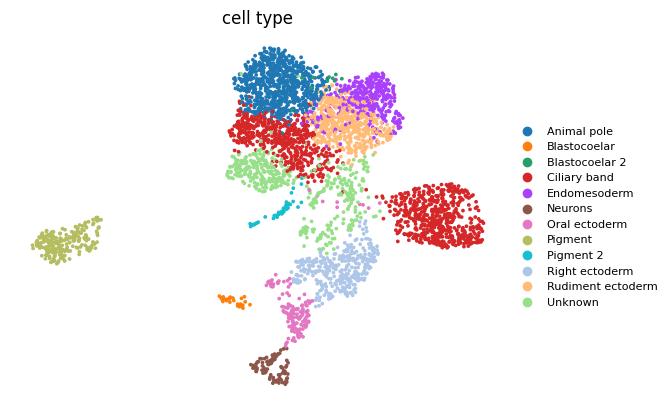

In [10]:
#View cluster UMAP


#Cluster 0: Animal pole	Six3, Sfrp1/5
#Cluster 1: Ciliary band	Btub3 (multiple)
#Cluster 2: Rudiment ectoderm	Egfi
#Cluster 3: Endomesoderm	Hox7, Smad6/7
#Cluster 4: Ciliary band	Btub3 (multiple)
#Cluster 5: Right ectoderm	Pitx2
#Cluster 6: Pigment	Pks1 (not in top 50 but very clearly exclusive to this cluster)
#Cluster 7: Unknown	
#Cluster 8: Ciliary band	Btub3 (multiple)
#Cluster 9: Oral ectoderm	SoxC
#Cluster 10: Unknown	
#Cluster 11: Neurons	Snap25, Syt4 (synaptotagmin)
#Cluster 12: Unknown	
#Cluster 13: Pigment 2	Pks1
#Cluster 14: Blastocoelar 1	Astacin4
#Cluster 15: Blastocoelar 2	Astacin4


cluster_annotation = {
    "0": "Animal pole",
    "1": "Ciliary band",
    "2": "Rudiment ectoderm",
    "3": "Endomesoderm",
    "4": "Ciliary band",
    "5": "Right ectoderm",
    "6": "Pigment",
    "7": "Unknown",
    "8": "Ciliary band",
    "9": "Oral ectoderm",
    "10": "Unknown",
    "11": "Neurons",
    "12": "Unknown",
    "13": "Pigment 2",
    "14": "Blastocoelar",
    "15": "Blastocoelar 2"
}



# Example if you want to use a clustering result (e.g., 'leiden' or 'louvain')
he48.obs['clusters'] = he48.obs['leiden']  # or replace 'leiden' with your actual clustering key

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
he48.obs["cell type"] = he48.obs["clusters"].map(cluster_annotation).astype("category")

sc.pl.umap(
    he48,
    color="cell type",
    legend_loc="right margin",
    frameon=False,
    legend_fontsize=8,
    legend_fontoutline=2,
)

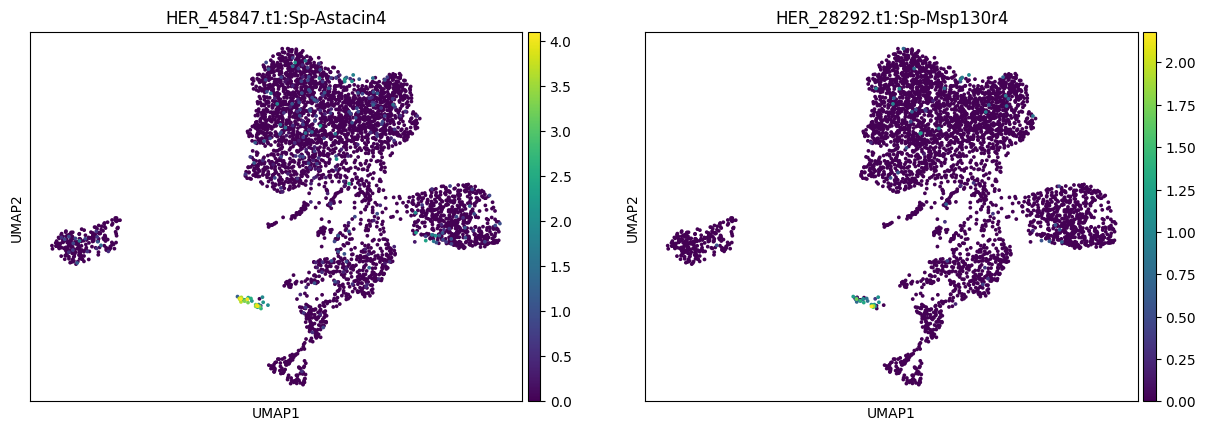

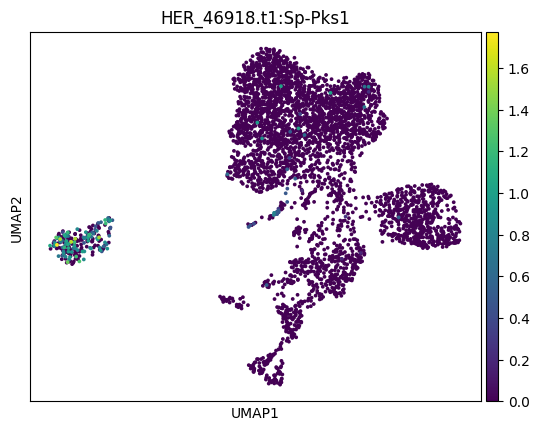

categories: 0, 1, 2, etc.
var_group_labels: 14


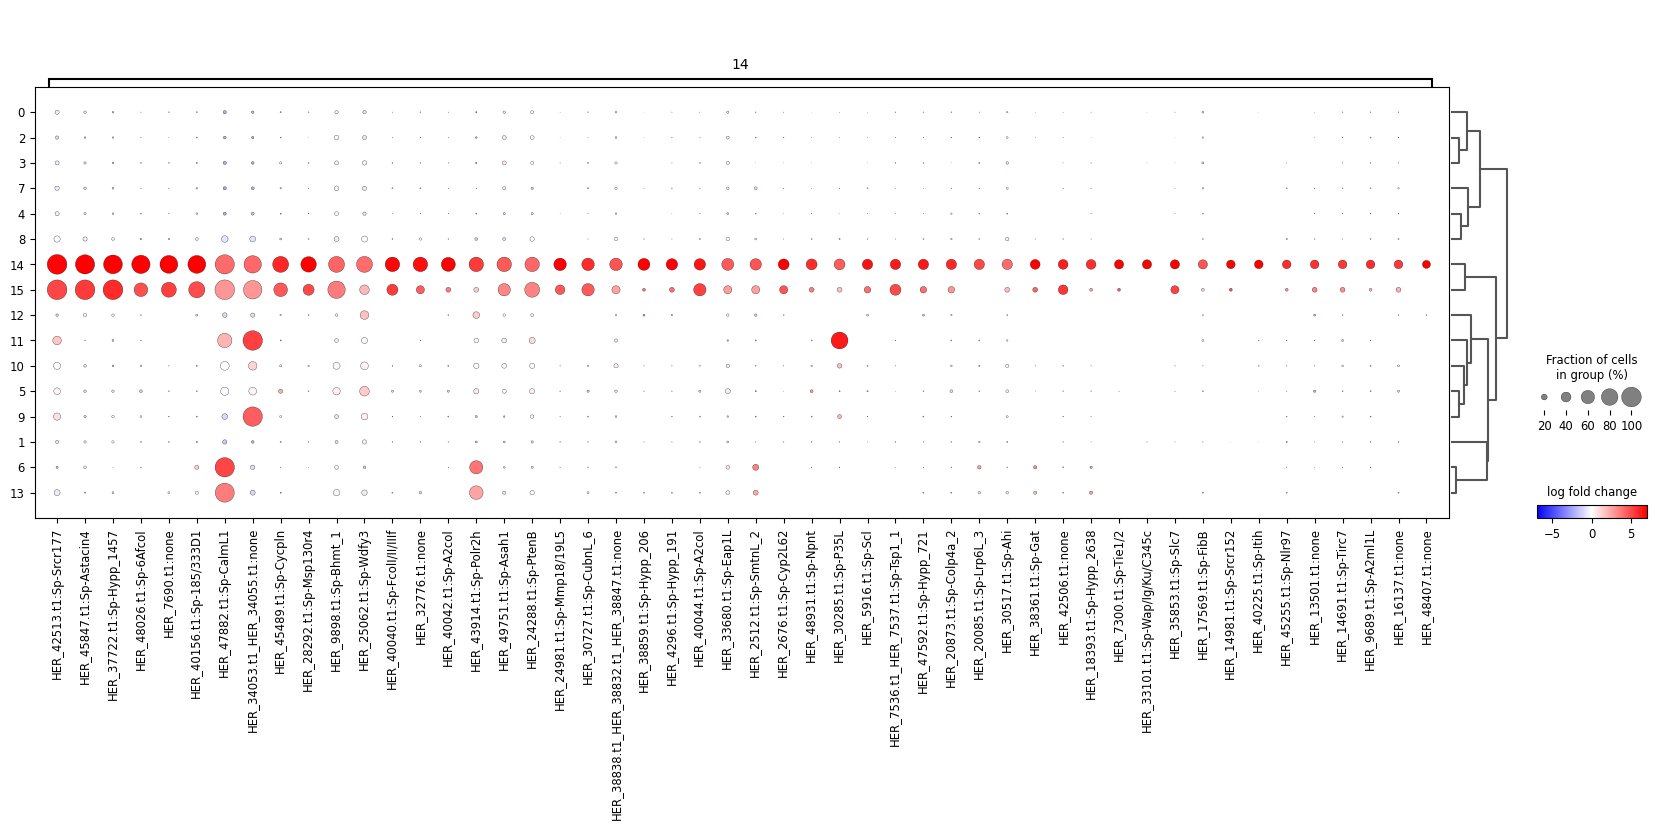

'\nbiomin_genes = {\n    "Blastocoelar cells": ["HER_45847.t1:Sp-Astacin4"],\n    "Skeletogenic cells": ["HER_28292.t1:Sp-Msp130r4", "HER_43733.t1:Sp-Sm50", "HER_26255.t1:Sp-Sm37", "HER_12794.t1:Sp-Alx1", "HER_11066.t1:Sp-FoxB"]\n    }\n\n\nsc.pl.dotplot(he48, biomin_genes, "clusters", dendrogram=True)\n'

In [7]:
#Look at markers of skeletogenic and blastocoelar genes

sc.pl.umap(he48, color=["HER_45847.t1:Sp-Astacin4", "HER_28292.t1:Sp-Msp130r4"])

sc.pl.umap(he48, color=["HER_46918.t1:Sp-Pks1"])

sc.pl.rank_genes_groups_dotplot(he48,
    n_genes=50,
    values_to_plot="logfoldchanges",
    min_logfoldchange=4,
    vmax=7,
    vmin=-7,
    cmap="bwr",
    groups=["14"],)

"""
biomin_genes = {
    "Blastocoelar cells": ["HER_45847.t1:Sp-Astacin4"],
    "Skeletogenic cells": ["HER_28292.t1:Sp-Msp130r4", "HER_43733.t1:Sp-Sm50", "HER_26255.t1:Sp-Sm37", "HER_12794.t1:Sp-Alx1", "HER_11066.t1:Sp-FoxB"]
    }


sc.pl.dotplot(he48, biomin_genes, "clusters", dendrogram=True)
"""
